In [32]:
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import mglearn
from IPython.display import display

In [23]:
data = pd.read_csv("defaultcreditcards.csv")
index = data.index
columns = data.columns
values = data.values

/home/adir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


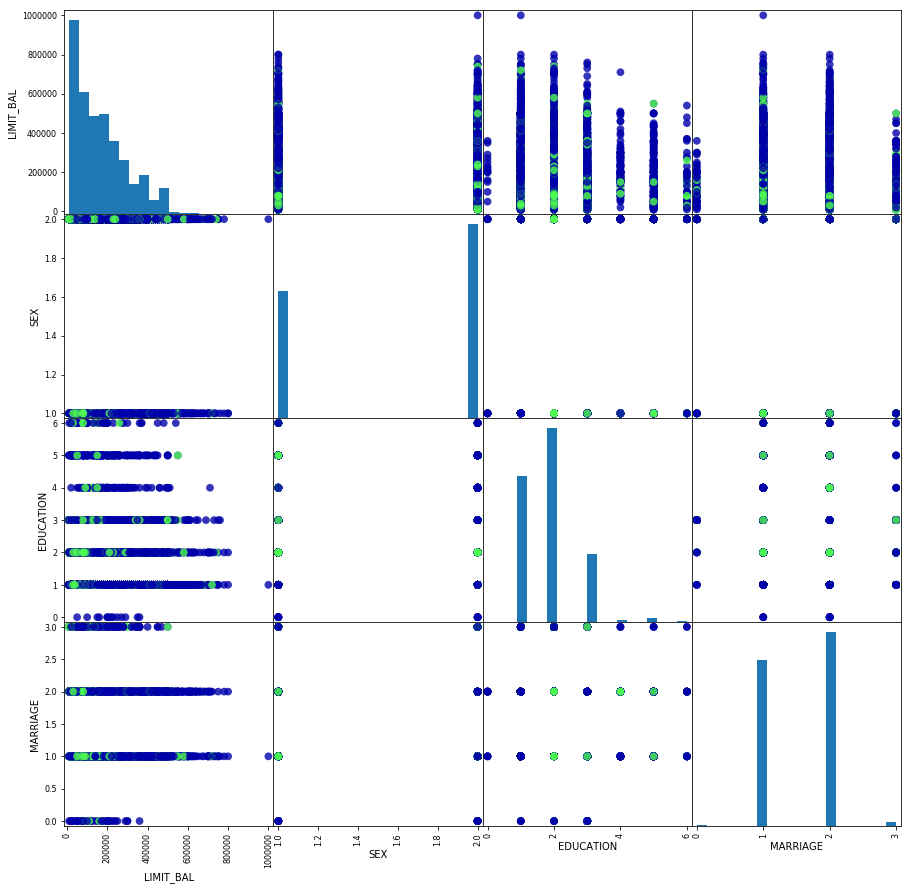

In [33]:
Y = data['nxt_mo_default_pay']
X = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
X_reduced = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']]
scamat = pd.scatter_matrix( X_reduced, c = Y, figsize = (15,15), marker = '0', hist_kwds={'bins': 20}, s = 60,
                          alpha = .8, cmap =mglearn.cm3)



In [ ]:
credit_datafram = pd.DataFrame()

In [15]:
data = np.array(data)
Y = data[:,24]
X = data[:,1:23]
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [20]:
reg = KNeighborsRegressor(n_neighbors = 50)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=50, p=2,
          weights='uniform')

In [47]:
prediction = reg.predict(X_test)
logpredict = []
i = 0
while i < len(prediction):
    if prediction[i] < .50:
        j = 0
        logpredict.append(j)
    elif prediction[i] > .5:
        j = 1
        logpredict.append(j)
    i += 1

predict_coo = sparse.coo_matrix((logpredict))
#print(predict_coo)
#print(logpredict)
print("Test set predictions:\n{}".format(reg.predict(X_test)))

  (0, 76)	1
  (0, 87)	1
  (0, 91)	1
  (0, 106)	1
  (0, 145)	1
  (0, 152)	1
  (0, 161)	1
  (0, 285)	1
  (0, 310)	1
  (0, 370)	1
  (0, 449)	1
  (0, 481)	1
  (0, 502)	1
  (0, 878)	1
  (0, 905)	1
  (0, 911)	1
  (0, 924)	1
  (0, 964)	1
  (0, 1006)	1
  (0, 1113)	1
  (0, 1131)	1
  (0, 1176)	1
  (0, 1220)	1
  (0, 1429)	1
  (0, 1431)	1
  :	:
  (0, 6116)	1
  (0, 6158)	1
  (0, 6200)	1
  (0, 6236)	1
  (0, 6242)	1
  (0, 6258)	1
  (0, 6313)	1
  (0, 6340)	1
  (0, 6398)	1
  (0, 6507)	1
  (0, 6537)	1
  (0, 6745)	1
  (0, 6787)	1
  (0, 6931)	1
  (0, 7046)	1
  (0, 7163)	1
  (0, 7190)	1
  (0, 7209)	1
  (0, 7291)	1
  (0, 7316)	1
  (0, 7330)	1
  (0, 7337)	1
  (0, 7388)	1
  (0, 7392)	1
  (0, 7447)	1
Test set predictions:
[0.12 0.3  0.34 ... 0.58 0.22 0.14]


In [22]:
#print("Test set R^2: {:.2f}".format(reg.score(X_test,y_test)))

Test set R^2: 0.05


In [49]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3,3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeigghborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c =mglearn.cm2(0),markersize = 8)
    ax.plot(X_test, y_test, 'v',c = mglearn.cm2(1) markersize = 8)
    
    ax.set_title(
        "{} neighbors(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train,y_train)
        reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabe("target")
axes[0].legend(["model predictions", "training data/targer", "test data/target"], loc = "best")
    

SyntaxError: invalid syntax (<ipython-input-49-2567a3884da5>, line 8)